In [1]:

import pandas as pd

from datetime import date
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(10, 6)})

In [4]:
# read data from file
data = pd.read_excel("data//data.xlsx")
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,open quantity,Delivery deviation in days,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Unnamed: 34,Unnamed: 35
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,3,NaN,NaN,3,under-delivery,6720.0,EUR,1,NaN,NaN
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,3,NaN,NaN,3,under-delivery,18162.0,EUR,1,NaN,NaN
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,3,NaN,NaN,3,under-delivery,5710.0,EUR,1,NaN,NaN
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,3,NaN,NaN,3,under-delivery,29890.0,EUR,1,NaN,NaN
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,3,NaN,NaN,3,under-delivery,9646.0,EUR,1,NaN,NaN


# Datenanpassungen

In [5]:
#dropping some columns since unnecessaary 
data.drop("Unnamed: 34", inplace=True, axis = 1) 
data.drop("Unnamed: 35", inplace=True, axis = 1) 
data.drop("Delivery deviation  in days", inplace=True, axis = 1)

In [6]:
data["Delivery deviation in days"] = data["delivery date"] - data["supplier delivery date"]

In [7]:
data["Delivery deviation in days"] = data["Delivery deviation in days"].apply(lambda x: float(x.days))

In [8]:
conditions = [(data['Delivery deviation in days'] <= 0),
              (data['Delivery deviation in days'] >= 1) & (data['Delivery deviation in days'] <= 4),
              (data['Delivery deviation in days'] >= 5) & (data['Delivery deviation in days'] <= 10),
              (data['Delivery deviation in days'] > 10)]

In [9]:
values = ['in time', 'late: < 5 days', 'late: 5 to 10 days', 'late: > 10 days']

In [10]:
data['deviation indicator'] = np.select(conditions, values)

In [11]:
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.0,EUR,1,0.0
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.0,EUR,1,0.0
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.0,EUR,1,0.0
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.0,EUR,1,0.0
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.0,EUR,1,0.0


In [12]:
data['Year'] = data['Document Date'].dt.year
data['Month'] = data['Document Date'].dt.month
data["Year/Month"] = data

In [13]:
data.to_csv("data_01.csv")

# Seite 1: Lieferantenperformance (Visualisierung)

Gesamtsumme Ordered Spend & Anzahl Bestellungen (aktuel vs vorjahr)

In [18]:
orderedSpend_year = data.groupby(["Year"])[["Net Value"]].sum().reset_index()

data_2019 = data[data["Year"] == 2019]
data_2020 = data[data["Year"] == 2020]
numbOrders_2019 = len(data_2019["ORDERED Quantity"])

numbOrders_2020 = len(data_2020["ORDERED Quantity"])

orderedSpend_year

,Year,Net Value
0,2019,7.658801e+07
1,2020,2.318936e+07


In [20]:
numbOrders_2020

4197

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach Monaten
im Vergleich zum Vorjahr:

In [22]:
orderdSpend_numbOrders_month_2019 = data_2019.groupby(["Month"])[["Net Value"]].sum().reset_index()
orderdSpend_numbOrders_month_2020 = data_2020.groupby(["Month"])[["Net Value"]].sum().reset_index()

In [23]:
data

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.00,EUR,1,0.0
1,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.00,EUR,1,0.0
2,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.00,EUR,1,0.0
3,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.00,EUR,1,0.0
4,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.00,EUR,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,2020-04-04,NaN,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,4,...,2.0,2.0,0,in time,0,no deviation,80.86,EUR,1,0.0
12132,2020-04-04,NaN,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,5,...,2.0,2.0,0,in time,0,no deviation,96.82,EUR,1,0.0
12133,2020-04-17,NaN,2020,4,2020-04-24,2020-04-24,53,GB,8208040617,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0
12134,2020-04-17,NaN,2020,4,2020-04-24,2020-04-24,53,GB,8208040618,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0


In [51]:
sum_ordered_spend_and_number_orders_per_month_2020 = sum_ordered_spend_and_number_orders_per_month[sum_ordered_spend_and_number_orders_per_month["Year"] ==2020]
sum_ordered_spend_and_number_orders_per_month_2020 = sum_ordered_spend_and_number_orders_per_month_2020.groupby(["Month"])[["Net Value", "ORDERED Quantity"]].sum().reset_index()

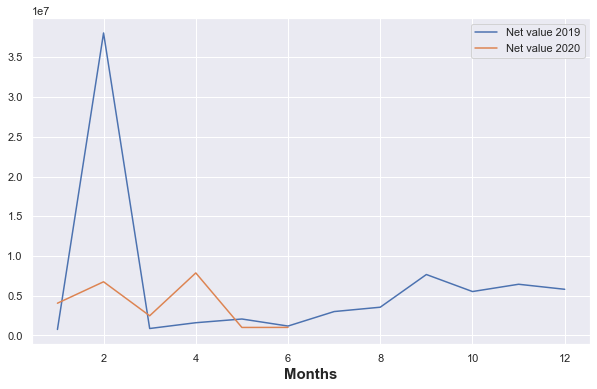

In [55]:
#  data
x_month_2019 = sum_ordered_spend_and_number_orders_per_month_2019["Month"]
x_month_2020 = sum_ordered_spend_and_number_orders_per_month_2020["Month"]

y_netvalue_2019 =  sum_ordered_spend_and_number_orders_per_month_2019["Net Value"]
y_OrdQuantity_2019 =  sum_ordered_spend_and_number_orders_per_month_2019["ORDERED Quantity"]

y_netvalue_2020 = sum_ordered_spend_and_number_orders_per_month_2020["Net Value"]
y_OrdQuantity_2020 = sum_ordered_spend_and_number_orders_per_month_2020["ORDERED Quantity"]

# plot lines
plt.plot(x_month_2019, y_netvalue_2019, label = "Net value 2019", )
plt.plot(x_month_2020, y_netvalue_2020, label = "Net value 2020")
plt.xlabel('Months', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

Text(0.5, 0, 'Months')

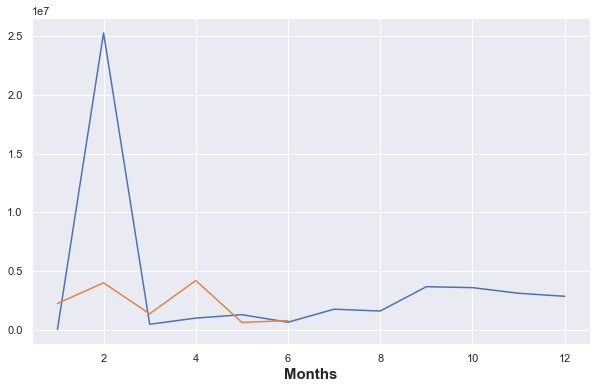

In [56]:
plt.plot(x_month_2019, y_OrdQuantity_2019, label = "Ordered Quantity 2019", )
plt.plot(x_month_2020, y_OrdQuantity_2020, label = "Ordered Quantitiy 2020")
plt.xlabel('Months', fontweight ='bold', fontsize = 15)

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach
Einkaufsorganisation im Vergleich zum Vorjahr

In [20]:
sum_ordered_spend_and_number_orders_per_purchasingOrg = data.groupby(["Purchasing Org."])[["Net Value", "ORDERED Quantity"]].sum().reset_index()

In [21]:
sum_ordered_spend_and_number_orders_per_purchasingOrg

,Purchasing Org.,Net Value,ORDERED Quantity
0,54,1.410867e+06,4980.00
1,5200,3.150065e+06,5200.00
2,5210,1.134735e+06,2478.00
3,5310,1.348624e+04,248.00
4,5320,1.990796e+04,318.00
5,5400,5.959146e+07,37784119.98
6,5410,3.414602e+07,20061025.98
7,5420,3.108341e+05,254670.00


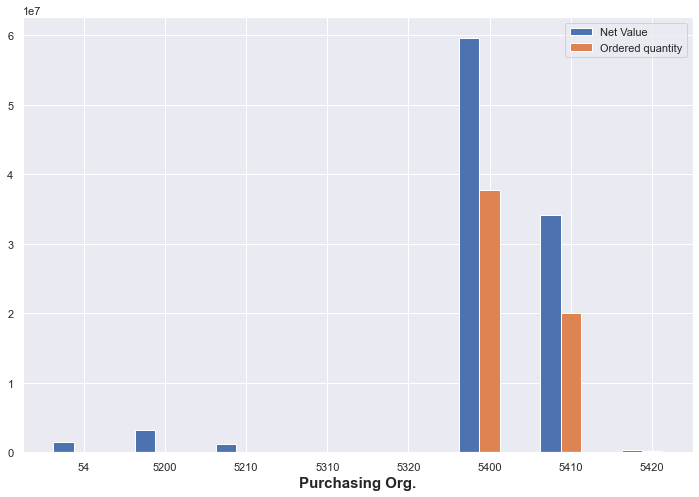

In [22]:

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
netValue = sum_ordered_spend_and_number_orders_per_purchasingOrg["Net Value"]
orderedQuantity = sum_ordered_spend_and_number_orders_per_purchasingOrg["ORDERED Quantity"]
 
# Set position of bar on X axis
br1 = np.arange(len(netValue))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, netValue, width = barWidth, label ='Net Value')
plt.bar(br2, orderedQuantity, width = barWidth, label ='Ordered quantity')

 
# Adding Xticks
plt.xlabel('Purchasing Org.', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(netValue))], sum_ordered_spend_and_number_orders_per_purchasingOrg["Purchasing Org."])
plt.legend()
plt.show()

Abweichende Lieferungen (Ordered Spend & Anzahl Bestellungen) der Top
10 Lieferanten nach Ordered Spend (aktuelles Jahr):

In [23]:
supplier_netValue = data.groupby(["Year","Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False)

In [24]:
supplier_netValue

,Year,Supplier name,Net Value
36,2019,ETELIERS DE LE HEUTE-GERU,21244885.45
176,2020,ETELIERS DE LE HEUTE-GERU,14487155.87
69,2019,LISI EERUSPECE,9124664.70
54,2019,HUMET FESTENING SYSTEMS,7548801.98
35,2019,ESPE HUTCHINSUN EERUSPECE,7423616.00
...,...,...,...
65,2019,LETECUERE,3.00
159,2020,DMV GMBH,3.00
116,2019,STELIE EERUSPECE CUMPUSIT,1.11
233,2020,SCHMITZ GMBH,1.00


In [25]:
top_10_2019 = supplier_netValue[supplier_netValue["Year"] ==2019].head(10)
top_10_2020 = supplier_netValue[supplier_netValue["Year"] ==2020].head(10)

In [26]:
top_10_2019

,Year,Supplier name,Net Value
36,2019,ETELIERS DE LE HEUTE-GERU,21244885.45
69,2019,LISI EERUSPECE,9124664.70
54,2019,HUMET FESTENING SYSTEMS,7548801.98
35,2019,ESPE HUTCHINSUN EERUSPECE,7423616.00
105,2019,SCHULZE GMBH,3025298.13
107,2019,SEFREN CEBIN FRENCE,3003709.41
2,2019,ALB GMBH,2368218.45
95,2019,PREMIUM GMBH,2014186.10
38,2019,EVIETIN LEUPHEIM GMBH,1823458.72
106,2019,SEEB EB (PUPL),1706573.16


In [27]:
top_10_2020

,Year,Supplier name,Net Value
176,2020,ETELIERS DE LE HEUTE-GERU,14487155.87
193,2020,HUMET FESTENING SYSTEMS,2337105.18
202,2020,LISI EERUSPECE,1558133.68
236,2020,SEFREN CEBIN FRENCE,970236.67
175,2020,ESPE HUTCHINSUN EERUSPECE,525644.12
251,2020,TITGEMEYER GEBR GMBH & CU,252900.00
243,2020,SPS TECHNULUGIES LTD,248128.20
266,2020,WESCU EIRCREFT EMEE LTD,244852.92
201,2020,LIEBHERR EERUSPECE TUULUU,239145.00
165,2020,EIR BP SWEDEN EB,227200.00


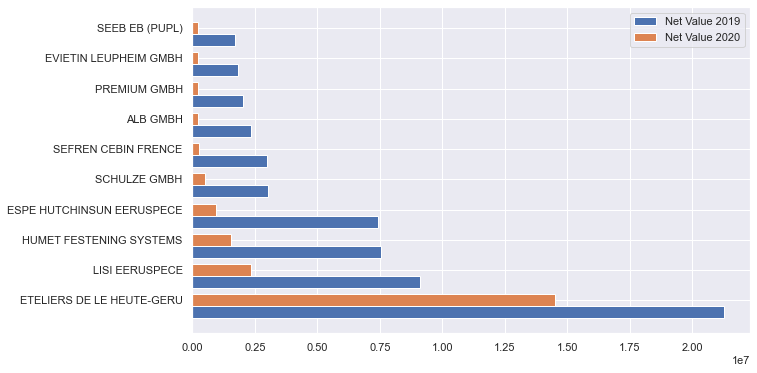

In [28]:
ind = np.arange(len(top_10_2019))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, top_10_2019["Net Value"], width, label='Net Value 2019')
ax.barh(ind + width, top_10_2020["Net Value"], width, label='Net Value 2020')

ax.set(yticks=ind + width, yticklabels=top_10_2019["Supplier name"])
ax.legend()

plt.show()

In [29]:
data

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.00,EUR,1,0.0
1,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.00,EUR,1,0.0
2,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.00,EUR,1,0.0
3,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.00,EUR,1,0.0
4,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.00,EUR,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,2020-04-04,NaN,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,4,...,2.0,2.0,0,in time,0,no deviation,80.86,EUR,1,0.0
12132,2020-04-04,NaN,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,5,...,2.0,2.0,0,in time,0,no deviation,96.82,EUR,1,0.0
12133,2020-04-17,NaN,2020,4,2020-04-24,2020-04-24,53,GB,8208040617,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0
12134,2020-04-17,NaN,2020,4,2020-04-24,2020-04-24,53,GB,8208040618,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0


In [30]:
data["Material Group"]

0        4017
1        4017
2        4017
3        4017
4        4017
         ... 
12131    4203
12132    4245
12133    4051
12134    4051
12135    4051
Name: Material Group, Length: 12136, dtype: object